## Import libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Data cleaning

In [37]:
df = pd.read_csv('./exp2_19drivers_1car_1route.csv')
df = df.dropna(how='all')

In [38]:
# utility function
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return float(h) * 3600 + float(m) * 60 + float(s)

In [39]:
#test set wrangling
df = df.dropna(subset=['SPEED', 'MAF'])
df['SPEED'] = df['SPEED'].apply(lambda x : float(x.replace('km/h', '')))
df_imputed = df.loc[df['SPEED'] != 0]
# remove dirty entries
df_imputed = df_imputed.drop([2661, 2699, 2643, 2976, 2980, 2631, 2993, 2922, 
                                        2808, 2861, 3004, 2789, 2826, 2644, 2645, 2659, 2744, 
                                        2935, 2692, 2698, 2837, 2675])

df_imputed['MAF'] = df_imputed['MAF'].fillna('0,0g/s')
df_imputed['MAF'] = df_imputed['MAF'].apply(lambda x : float(x.replace('g/s', '').replace(',', '.')))
df_imputed['FUEL_LEVEL'] = df_imputed['FUEL_LEVEL'].fillna('0,0%')
df_imputed['FUEL_LEVEL'] = df_imputed['FUEL_LEVEL'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['ENGINE_LOAD'] = df_imputed['ENGINE_LOAD'].fillna('0,0%')
df_imputed['ENGINE_LOAD'] = df_imputed['ENGINE_LOAD'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['SHORT TERM FUEL TRIM BANK 1'] = df_imputed['SHORT TERM FUEL TRIM BANK 1'].fillna('0%')
df_imputed['SHORT TERM FUEL TRIM BANK 1'] = df_imputed['SHORT TERM FUEL TRIM BANK 1'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['THROTTLE_POS'] = df_imputed['THROTTLE_POS'].fillna('0,0%')
df_imputed['THROTTLE_POS'] = df_imputed['THROTTLE_POS'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['TIMING_ADVANCE'] = df_imputed['TIMING_ADVANCE'].fillna('0,0%')
df_imputed['TIMING_ADVANCE'] = df_imputed['TIMING_ADVANCE'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['EQUIV_RATIO'] = df_imputed['EQUIV_RATIO'].fillna('0,0%')
df_imputed['EQUIV_RATIO'] = df_imputed['EQUIV_RATIO'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
df_imputed['AIR_INTAKE_TEMP'] = df_imputed['AIR_INTAKE_TEMP'].fillna('1C')
df_imputed['AIR_INTAKE_TEMP'] = df_imputed['AIR_INTAKE_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
df_imputed['INTAKE_MANIFOLD_PRESSURE'] = df_imputed['INTAKE_MANIFOLD_PRESSURE'].fillna('0kPa')
df_imputed['INTAKE_MANIFOLD_PRESSURE'] = df_imputed['INTAKE_MANIFOLD_PRESSURE'].apply(lambda x : float(x.replace('kPa', '').replace(',', '.')))
df_imputed['ENGINE_RPM'] = df_imputed['ENGINE_RPM'].fillna('0RPM')
df_imputed['ENGINE_RPM'] = df_imputed['ENGINE_RPM'].apply(lambda x : float(x.replace('RPM', '').replace(',', '.')))
df_imputed['AMBIENT_AIR_TEMP'] = df_imputed['AMBIENT_AIR_TEMP'].fillna('0C')
df_imputed['AMBIENT_AIR_TEMP'] = df_imputed['AMBIENT_AIR_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
df_imputed['ENGINE_COOLANT_TEMP'] = df_imputed['ENGINE_COOLANT_TEMP'].fillna('0C')
df_imputed['ENGINE_COOLANT_TEMP'] = df_imputed['ENGINE_COOLANT_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
df_imputed['BAROMETRIC_PRESSURE(KPA)'] = df_imputed['BAROMETRIC_PRESSURE(KPA)'].fillna('0kPa')
df_imputed['BAROMETRIC_PRESSURE(KPA)'] = df_imputed['BAROMETRIC_PRESSURE(KPA)'].apply(lambda x : float(x.replace('kPa', '').replace(',', '.')))
df_imputed['ENGINE_RUNTIME'] = df_imputed['ENGINE_RUNTIME'].fillna('0:0:0')
df_imputed['ENGINE_RUNTIME'] = df_imputed['ENGINE_RUNTIME'].apply(lambda x: get_sec(x))

In [40]:

df_imputed = df_imputed.drop(columns=['FUEL_PRESSURE', 'Short Term Fuel Trim Bank 2', 'TROUBLE_CODES', 'FUEL_TYPE', 'DTC_NUMBER',
                                    'Term Fuel Trim Bank 1', 'FUEL_ECONOMY', 'Long Term Fuel Trim Bank 2', 'TIME', 
                                     'LATITUDE', 'LONGITUDE', 'ALTITUDE'])
df_imputed = df_imputed.loc[df_imputed['ENGINE_RUNTIME'] != 0]
df_imputed = df_imputed.reset_index(drop = True)
df_imputed = df_imputed.interpolate()
df_imputed = df_imputed.fillna(0)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VEHICLE_ID                   6834 non-null   object 
 1   BAROMETRIC_PRESSURE(KPA)     6834 non-null   float64
 2   ENGINE_COOLANT_TEMP          6834 non-null   float64
 3   FUEL_LEVEL                   6834 non-null   float64
 4   ENGINE_LOAD                  6834 non-null   float64
 5   AMBIENT_AIR_TEMP             6834 non-null   float64
 6   ENGINE_RPM                   6834 non-null   float64
 7   INTAKE_MANIFOLD_PRESSURE     6834 non-null   float64
 8   MAF                          6834 non-null   float64
 9   AIR_INTAKE_TEMP              6834 non-null   float64
 10  SPEED                        6834 non-null   float64
 11  SHORT TERM FUEL TRIM BANK 1  6834 non-null   float64
 12  ENGINE_RUNTIME               6834 non-null   float64
 13  THROTTLE_POS      

## Data engineering

In [41]:
'''calculate fuel rate using the formula: 
fuel rate [L/H] = (MAF * 3600) / AFR / FD
where AFR = air-to-fuel ratio and FD = fuel density
both AFR and FD are constants 

calculate fuel consumption using the formula: 
fuel consumption [L/100KM] = fuel rate / speed * 100 '''

df_imputed['FUEL_RATE'] = (df_imputed['MAF'] * 3600) / 14.7 / 820

df_imputed['FUEL_CONSUMPTION'] = (df_imputed['FUEL_RATE'] / df_imputed['SPEED']) * 100

In [42]:
df_imputed['VEHICLE_ID'].unique()

array(['s11', 's5', 's10', 's9', 's7', 's8', 's18', 's3', 's2', 's1',
       's6', 's4', 's19', 's17', 's16', 's15', 's14', 's13', 's12'],
      dtype=object)

In [43]:
# align the runtime to start from 0 
for i in df_imputed['VEHICLE_ID'].unique():
    df_imputed['ENGINE_RUNTIME'].loc[df_imputed['VEHICLE_ID'] == i] = (df_imputed['ENGINE_RUNTIME'].loc[df_imputed['VEHICLE_ID'] == i] - 
                                                                        df_imputed['ENGINE_RUNTIME'].loc[df_imputed['VEHICLE_ID'] == i].values[0])

c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
# calculate fuel efficiency for every entry 
df_imputed['DISTANCE_MOVED'] = 0.0 # km
df_imputed['DISTANCE_SO_FAR'] = 0.0 # km
df_imputed['FUEL_CONSUMPTION_SO_FAR'] = 0.0 # l

for i in range(0, len(df_imputed)):
    if df_imputed['ENGINE_RUNTIME'].values[i] == 0.0:
        df_imputed['DISTANCE_MOVED'].values[i] = 0.0
        df_imputed['DISTANCE_SO_FAR'].values[i] = df_imputed['DISTANCE_MOVED'].values[i]
        df_imputed['FUEL_CONSUMPTION_SO_FAR'].values[i] = 0.0
    else:
        df_imputed['DISTANCE_MOVED'].values[i] = round((df_imputed['SPEED'].values[i] / 3600) * (
                                                    df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1]), 3) 
        df_imputed['DISTANCE_SO_FAR'].values[i] = round(df_imputed['DISTANCE_SO_FAR'].values[i - 1] + df_imputed['DISTANCE_MOVED'].values[i], 3)
        df_imputed['FUEL_CONSUMPTION_SO_FAR'].values[i] = df_imputed['FUEL_CONSUMPTION_SO_FAR'].values[i - 1] + (
                                                            (df_imputed['FUEL_CONSUMPTION'].values[i] / 100) * df_imputed['DISTANCE_MOVED'].values[i])
    
df_imputed['FUEL_EFFICIENCY'] = df_imputed['DISTANCE_SO_FAR'] / df_imputed['FUEL_CONSUMPTION_SO_FAR']
df_imputed['FUEL_EFFICIENCY'].loc[df_imputed['FUEL_EFFICIENCY'].isna()] = 0

c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:ylabel='FUEL_EFFICIENCY'>

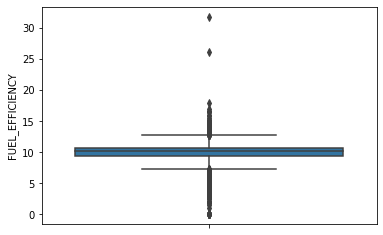

In [45]:
sns.boxplot(y='FUEL_EFFICIENCY', data=df_imputed)

In [46]:
# exclude outliers 
df_imputed.drop(df_imputed[df_imputed['FUEL_EFFICIENCY'] > 25].index, inplace=True)

<AxesSubplot:ylabel='FUEL_EFFICIENCY'>

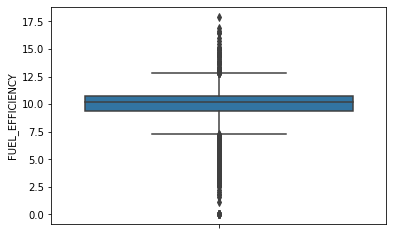

In [47]:
sns.boxplot(y='FUEL_EFFICIENCY', data=df_imputed)

In [48]:
# exclude outliers 
df_imputed.drop(df_imputed[df_imputed['FUEL_EFFICIENCY'] > 25].index, inplace=True)

# calculate fuel efficiency score for every entry
df_imputed['RELATIVE_FUEL_EFFICIENCY_SCORE'] = 50.0
MAX_FUEL_EFFICIENCY_SCORE = max(df_imputed['FUEL_EFFICIENCY'])
df_imputed['RELATIVE_FUEL_EFFICIENCY_SCORE'] = df_imputed['FUEL_EFFICIENCY'] / MAX_FUEL_EFFICIENCY_SCORE * 100

df_imputed['THROTTLE_EFFICIENCY'] = 100 - df_imputed['THROTTLE_POS']
df_imputed['RELATIVE_THROTTLE_SCORE'] = 50.0
MAX_THROTTLE = max(df_imputed['THROTTLE_EFFICIENCY'])
df_imputed['RELATIVE_THROTTLE_SCORE'] = df_imputed['THROTTLE_EFFICIENCY'] / MAX_THROTTLE * 100

df_imputed['RELATIVE_ECO_DRIVING_SCORE'] = 50.0
df_imputed['ECO_DRIVING_SCORE'] = df_imputed['RELATIVE_FUEL_EFFICIENCY_SCORE'] * 0.75 + df_imputed['THROTTLE_EFFICIENCY'] * 0.25
MAX_ECO_DRIVING_SCORE = max(df_imputed['ECO_DRIVING_SCORE'])
df_imputed['RELATIVE_ECO_DRIVING_SCORE'] = df_imputed['ECO_DRIVING_SCORE'] / MAX_ECO_DRIVING_SCORE * 100

<AxesSubplot:ylabel='THROTTLE_EFFICIENCY'>

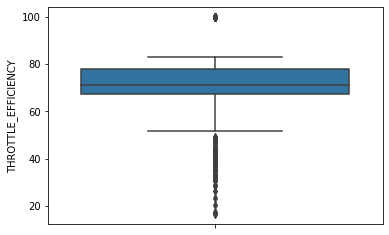

In [49]:
sns.boxplot(y='THROTTLE_EFFICIENCY', data=df_imputed)

In [50]:
SPEED_CHANGE = [] 

for i in range(1, len(df_imputed)):
    change_rate = (df_imputed['SPEED'].values[i] - df_imputed['SPEED'].values[i - 1]) / (
        df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1])
    if change_rate < 1:
        change_rate = 1
    SPEED_CHANGE.append(change_rate)

SPEED_CHANGE.insert(0, df_imputed['SPEED'].values[0])
df_imputed['SPEED_CHANGE_RATE'] = [abs(x) for x in SPEED_CHANGE]
# 220 is the normal maxium speed
df_imputed['MODIFIED_SPEED'] = [(x / 220) for x in df_imputed['SPEED']]

In [51]:
RPM_CHANGE = []

for i in range(1, len(df_imputed)):
    change_rate = (df_imputed['ENGINE_RPM'].values[i] - df_imputed['ENGINE_RPM'].values[i - 1]) / (
        df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1])
    if change_rate < 1:
        change_rate = 1
    RPM_CHANGE.append(change_rate)

RPM_CHANGE.insert(0, df_imputed['ENGINE_RPM'].values[0])
df_imputed['RPM_CHANGE_RATE'] = [abs(x) for x in RPM_CHANGE]
# 8000 is the normal maxium RPM
df_imputed['MODIFIED_RPM'] = [(x / 8000) for x in df_imputed['ENGINE_RPM']]
df_imputed['MODIFIED_RPM'].loc[df_imputed['MODIFIED_RPM'] == 0] = 0.1
df_imputed['SPEED_RPM_RATIO'] = df_imputed['MODIFIED_SPEED'] / df_imputed['MODIFIED_RPM']

c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
THROTTLE_CHANGE = []

for i in range(1, len(df_imputed)):
    change_rate = (df_imputed['THROTTLE_POS'].values[i] - df_imputed['THROTTLE_POS'].values[i - 1]) / (
        df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1])

    THROTTLE_CHANGE.append(change_rate)

THROTTLE_CHANGE.insert(0, df_imputed['THROTTLE_POS'].values[0])
df_imputed['THROTTLE_CHANGE_RATE'] = [abs(x) for x in THROTTLE_CHANGE]
# 14.7 is the largest throttle change rate
df_imputed['MODIFIED_THROTTLE_RATE'] = [(x / 14.7) for x in df_imputed['THROTTLE_CHANGE_RATE']]

In [53]:
df_imputed['ACCELERATION'] = 0.0 # m/s
df_imputed['CAR_JERK'] = 0.0 # m/s

for i in range(0, len(df_imputed)):
    if df_imputed['ENGINE_RUNTIME'].values[i] == 0.0:
        df_imputed['ACCELERATION'].values[i] = 0.0
        df_imputed['CAR_JERK'].values[i] = 0.0 
    else:
        df_imputed['ACCELERATION'].values[i] = ((df_imputed['SPEED'].values[i] - df_imputed['SPEED'].values[i - 1]) / 3.6) / (
                                                df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1])
        df_imputed['CAR_JERK'].values[i] = (df_imputed['ACCELERATION'].values[i] - df_imputed['ACCELERATION'].values[i - 1]) / (
                                            df_imputed['ENGINE_RUNTIME'].values[i] - df_imputed['ENGINE_RUNTIME'].values[i - 1])

## Pseudo-inverse polynomial fuel estimation

In [54]:
rpm = df_imputed['ENGINE_RPM']
load = df_imputed['ENGINE_LOAD']
y = df_imputed['MAF'] / 14.7 / 1000 # mass fuel flow rate [kg/s]

rpm2 = rpm.apply(lambda x: np.power(x, 2))
rpm3 = rpm.apply(lambda x: np.power(x, 3))
load2 = load.apply(lambda x: np.power(x, 2))
rpm_load = rpm * load
rpm2_load = rpm2 * load
rpm_load2 = rpm * load2
rpm3_load = rpm3 * load
rpm2_load2 = rpm2 * load2

In [55]:
L2 = np.concatenate((np.matrix(rpm).T, np.matrix(rpm_load).T, np.matrix(rpm2_load).T, np.matrix(rpm3_load).T, np.matrix(rpm_load2).T, np.matrix(rpm2_load2).T), axis=1) #L2
L2 = np.dot(np.linalg.pinv(L2), y)

L3 = np.concatenate((np.matrix(rpm).T, np.matrix(rpm2).T, np.matrix(rpm3).T, np.matrix(rpm_load).T, np.matrix(rpm2_load).T, np.matrix(rpm_load2).T), axis=1) #L3
L3 = np.dot(np.linalg.pinv(L3), y)

In [56]:
# predict ideal fuel consumptions
optimal_L2 = []
optimal_L3 = []

for i in range(0, len(df_imputed)):
   mfr_L2 = (L2[0, 0] * rpm[i] + L2 [0, 1] * rpm_load[i] + L2 [0, 2]  * rpm2_load[i] - 
         L2[0, 3]* rpm3_load[i] + L2[0, 4] * rpm_load2[i] - L2[0, 5] * rpm2_load2[i]) 
   mfr_L3 = (L3[0, 0] * rpm[i] + L3[0, 1] * rpm2[i] - L3[0, 2] * rpm3[i] + 
         L3[0, 3] * rpm_load[i] - L3[0, 4] * rpm2_load[i] + L3[0, 5] * rpm_load2[i]) 
   optimal_L2.append(mfr_L2)
   optimal_L3.append(mfr_L3)

ideal_fuel_rate_L2 = pd.Series(map(lambda x: x * (3600 / 820) * 1000, optimal_L2)) # fuel flow rate [l/h]
ideal_fuel_rate_L3 = pd.Series(map(lambda x: x * (3600 / 820) * 1000, optimal_L3)) # fuel flow rate [l/h]
ideal_fuel_consumption_L2 = (ideal_fuel_rate_L2 / df_imputed['SPEED']) * 100 # fuel consumption [l/km]
ideal_fuel_consumption_L3 = (ideal_fuel_rate_L3 / df_imputed['SPEED']) * 100 # fuel consumption [l/km]
df_imputed['IDEAL_FUEL_CONSUMPTION_L2'] = ideal_fuel_consumption_L2
df_imputed['IDEAL_FUEL_CONSUMPTION_L3'] = ideal_fuel_consumption_L3



KeyError: 1225

## Visualization

In [ ]:
s1 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's1']
s2 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's2']
s3 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's3']
s4 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's4']
s5 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's5']
s6 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's6']
s7 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's7']
s8 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's8']
s9 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's9']
s10 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's10']
s11 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's11']
s12 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's12']
s13 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's13']
s14 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's14']
s15 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's15']
s16 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's16']
s17 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's17']
s18 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's18']
s19 = df_imputed.loc[df_imputed['VEHICLE_ID'] == 's19']

### Ideal fuel consumption

<AxesSubplot:xlabel='ENGINE_RUNTIME'>

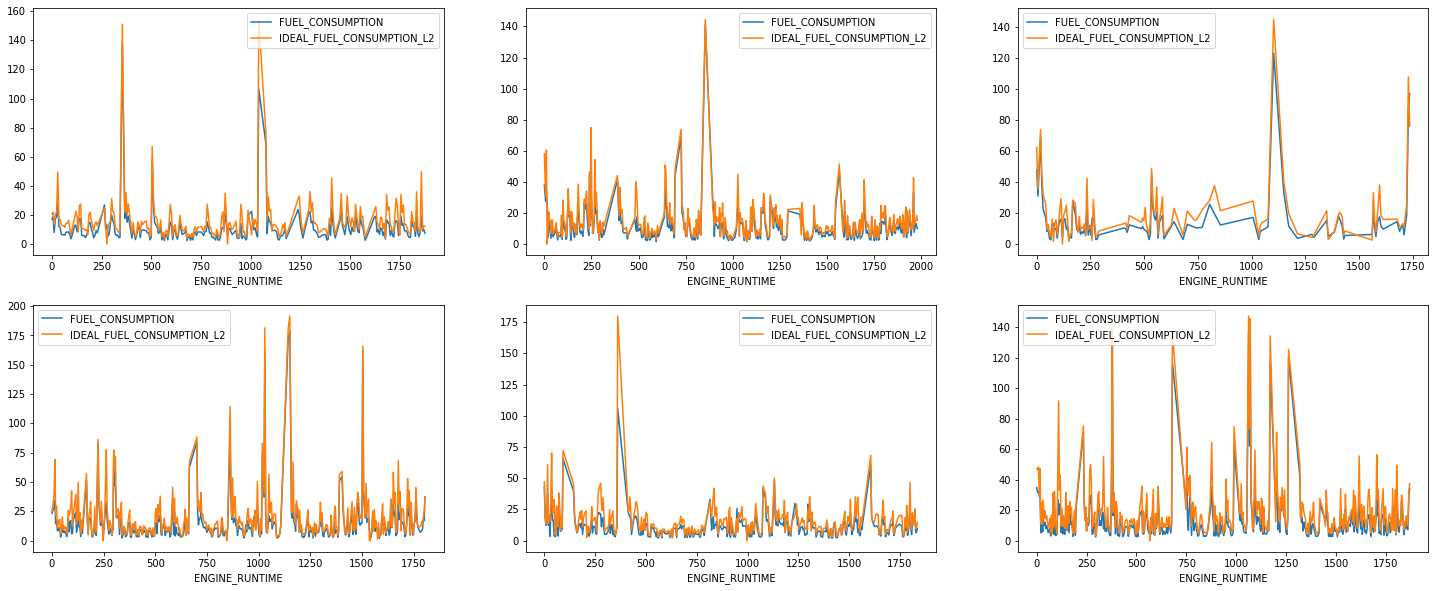

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(25)

s1.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[0,0])
s1.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[0,0])

s2.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[0,1])
s2.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[0,1])

s3.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[0,2])
s3.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[0,2])

s4.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[1,0])
s4.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[1,0])

s5.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[1,1])
s5.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[1,1])

s6.plot('ENGINE_RUNTIME', 'FUEL_CONSUMPTION', ax = axes[1,2])
s6.plot('ENGINE_RUNTIME', 'IDEAL_FUEL_CONSUMPTION_L2', ax = axes[1,2])

### Speed_RPM ratio

Text(0, 0.5, 'Speed Change Rate / KM/H')

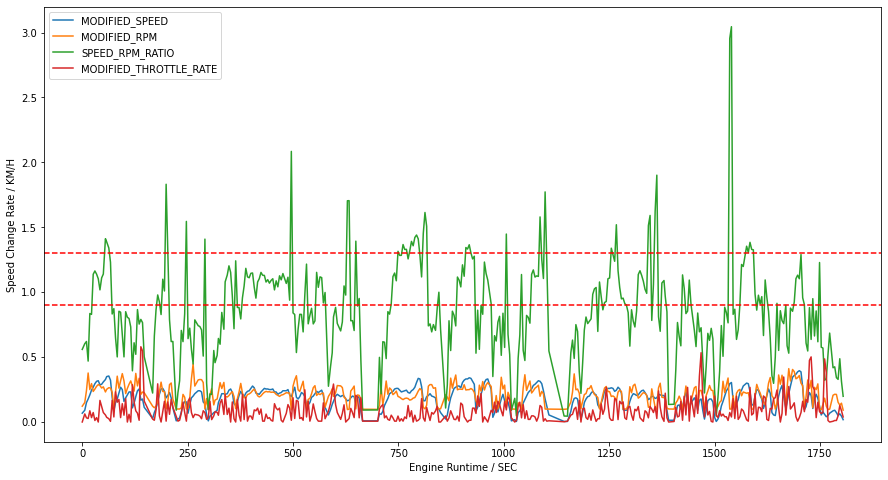

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)


s4.plot('ENGINE_RUNTIME', 'MODIFIED_SPEED', ax = ax)
s4.plot('ENGINE_RUNTIME', 'MODIFIED_RPM', ax = ax)
s4.plot('ENGINE_RUNTIME', 'SPEED_RPM_RATIO', ax = ax)
s4.plot('ENGINE_RUNTIME', 'MODIFIED_THROTTLE_RATE', ax = ax)
ax.axhline(y = 1.3, color='r', linestyle='--')
ax.axhline(y = 0.9, color='r', linestyle='--')

plt.legend(['MODIFIED_SPEED', 'MODIFIED_RPM', "SPEED_RPM_RATIO", 'MODIFIED_THROTTLE_RATE'])
plt.xlabel('Engine Runtime / SEC')
plt.ylabel('Speed Change Rate / KM/H')

### Fuel efficiency

<AxesSubplot:xlabel='DISTANCE_SO_FAR', ylabel='RELATIVE_FUEL_EFFICIENCY_SCORE'>

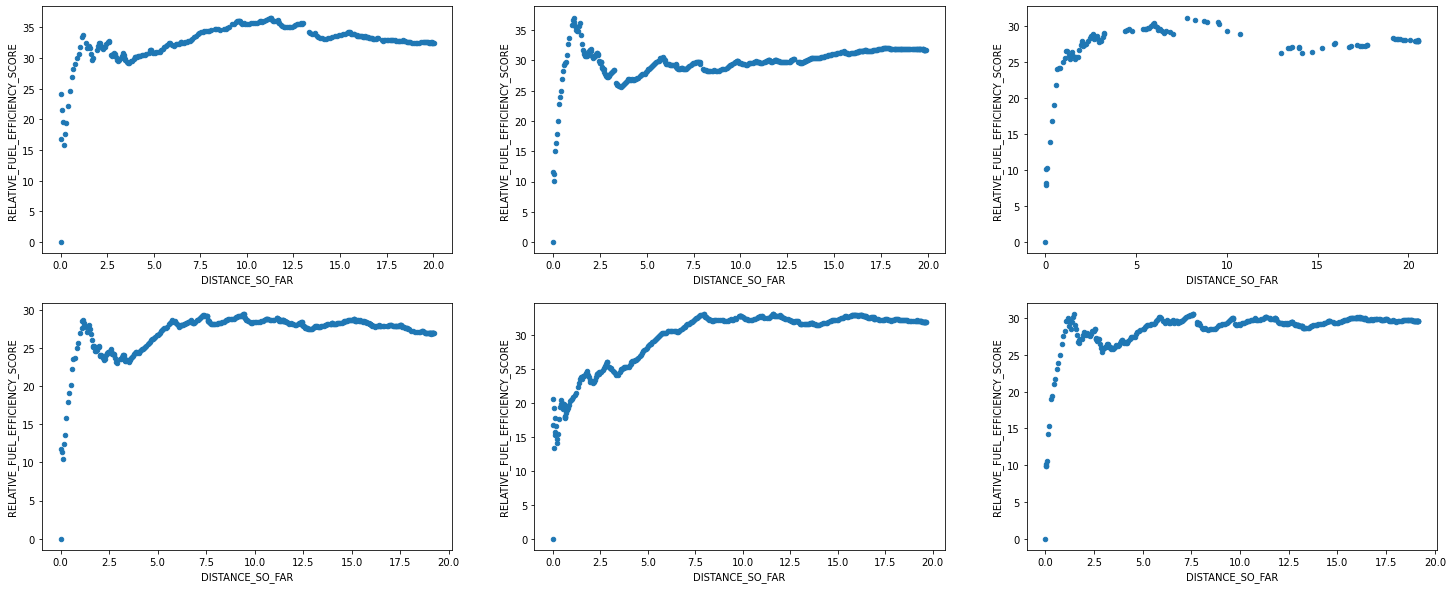

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(25)

s1.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[0,0])

s2.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[0,1])

s3.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[0,2])

s4.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[1,0])

s5.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[1,1])

s6.plot.scatter(x='DISTANCE_SO_FAR', y='RELATIVE_FUEL_EFFICIENCY_SCORE', ax = axes[1,2])

In [ ]:
df_imputed.to_csv("{}.csv".format('19drivers_eco_score'), index = False)